In [212]:
# Libraries
import numpy as np
import pandas as pd
import plotly as plt
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_random_state
from sklearn.metrics import mean_absolute_error, mean_squared_error
import graphviz
from collections import OrderedDict
from sympy import simplify
from math import sqrt,log

# For Support Vector Regression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# For GPLearn
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

In [3]:
all_stats = pd.read_csv("./Datasets/All_Datasets_Stats.csv")
GPLearnAl = pd.read_csv("./GPLearn/Configurations/Al.csv")
GPLearnBB = pd.read_csv("./GPLearn/Configurations/BB.csv")
GPLearnSt = pd.read_csv("./GPLearn/Configurations/St.csv")
GPLearnBM = pd.read_csv("./GPLearn/Configurations/time.csv")

RRAl = pd.read_csv("./RandomForest/Configurations/Al.csv")
RRBB = pd.read_csv("./RandomForest/Configurations/BB.csv")
RRSt = pd.read_csv("./RandomForest/Configurations/St.csv")
RRBM = pd.read_csv("./RandomForest/Configurations/time.csv")

SVAl = pd.read_csv("./SupportVectorRegression/Configurations/Al.csv")
SVBB = pd.read_csv("./SupportVectorRegression/Configurations/BB.csv")
SVSt = pd.read_csv("./SupportVectorRegression/Configurations/St.csv")
SVBM = pd.read_csv("./SupportVectorRegression/Configurations/time.csv")

# addCol(GPLearnBB)
# GPLearn["Algorithms"] = "GPLearn"
# GPLearn["irace"] = "irace"
# GPLearnRMSE = GPLearn["rmse"]
# Random_Forest = pd.read_csv("./RandomForest/time.csv")
# Random_Forest["Algorithms"] = "Random Forest Regressor"
# Random_Forest["irace"] = "irace"
# Random_ForestRMSE = Random_Forest["rmse"]
# Support_Vector_Regression = pd.read_csv("./SupportVectorRegression/time.csv")
# Support_Vector_Regression["Algorithms"] = "Support Vector Regression"
# Support_Vector_Regression["irace"] = "irace"
# Support_Vector_RegressionRMSE = Support_Vector_Regression["rmse"]
# Support_Vector_Regression

In [4]:
GPLearnAl["Dataset"] = "Al-Feymann"
GPLearnBB["Dataset"] = "Black-box"
GPLearnSt["Dataset"] = "Strogatz"
GPLearnBM["Dataset"] = "Synthetic"

RRAl["Dataset"] = "Al-Feymann"
RRBB["Dataset"] = "Black-box"
RRSt["Dataset"] = "Strogatz"
RRBM["Dataset"] = "Synthetic"

SVAl["Dataset"] = "Al-Feymann"
SVBB["Dataset"] = "Black-box"
SVSt["Dataset"] = "Strogatz"
SVBM["Dataset"] = "Synthetic"

all_GP = GPLearnAl.append(GPLearnBB.append(GPLearnSt.append(GPLearnBM)))
all_RR = RRAl.append(RRBB.append(RRSt.append(RRBM)))
all_SVR = SVAl.append(SVBB.append(SVSt.append(SVBM)))

all_GP["Algorithms"] = "GPLearn"
all_RR["Algorithms"] = "Random Forest Regressor"
all_SVR["Algorithms"] = "Support Vector Regressor"

alldata = all_GP.append(all_RR.append(all_SVR))

In [5]:
# # Clean dataset
# def clean (DATA):
#     for i in range(len(DATA) ):
#         if DATA.File[i].find("../Datasets/") != -1:
#             print(DATA.File[i]) 
#             DATA.File[i] = DATA.File[i].replace("../Datasets/","")
#     DATA.to_csv("./GPLearn/Configurations/BB.csv", index=False)
# clean(GPLearnBB)

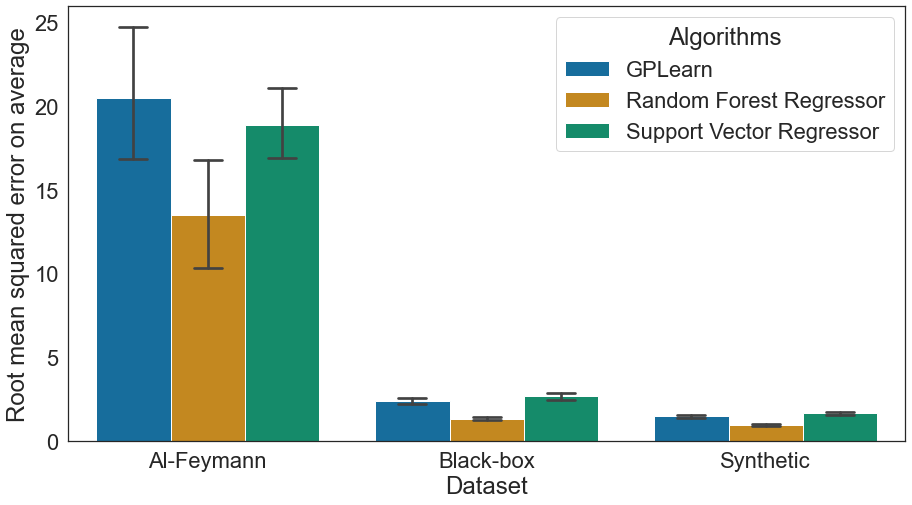

In [202]:
sns.set(font_scale=2)
sns.set_style("white")
alldata = alldata.rename(columns={"Average root mean squared error":"Root mean squared error on average"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Root mean squared error on average", hue= "Algorithms", palette="colorblind" , capsize=.1, data = alldata)





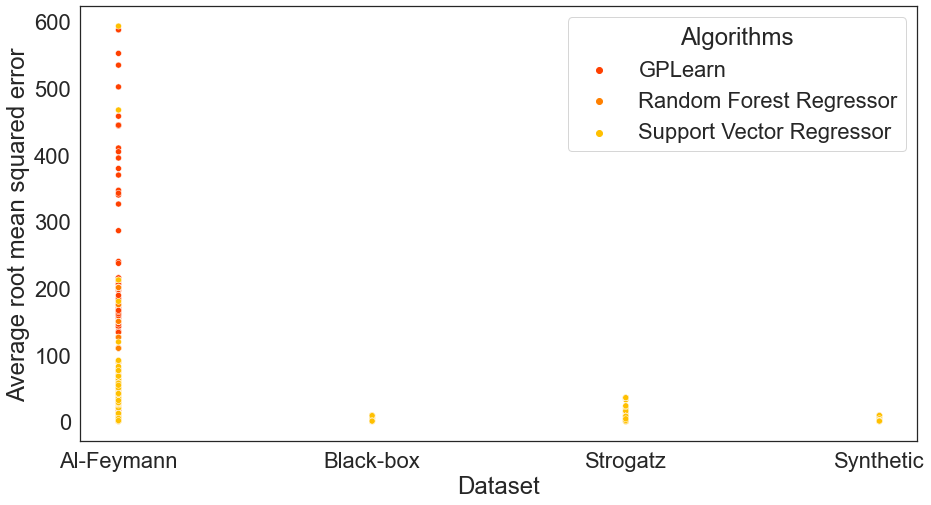

In [7]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Dataset", y = "Average root mean squared error", hue= "Algorithms", palette="autumn" , data = alldata)

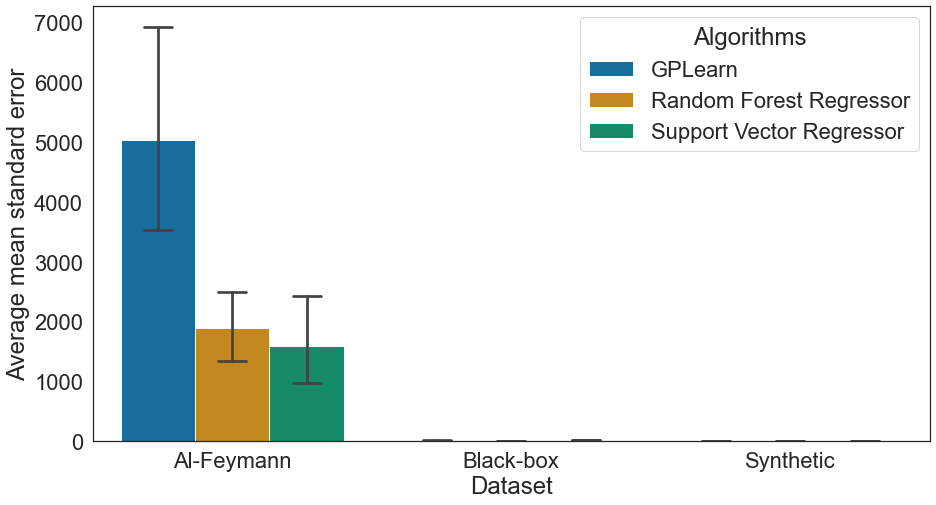

In [201]:
# alldata.rmse =  alldata[alldata["Age"] > 35]
# alldata =  alldata[alldata["Dataset"] != "Al-Feymann" ]
# alldata =  alldata[alldata["Dataset"] != "Strogatz" ]
sns.set(font_scale=2)
sns.set_style("white")
alldata = alldata.rename(columns={"mse":"Average mean standard error"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean standard error", hue= "Algorithms", palette="colorblind" ,capsize=.1, data = alldata)



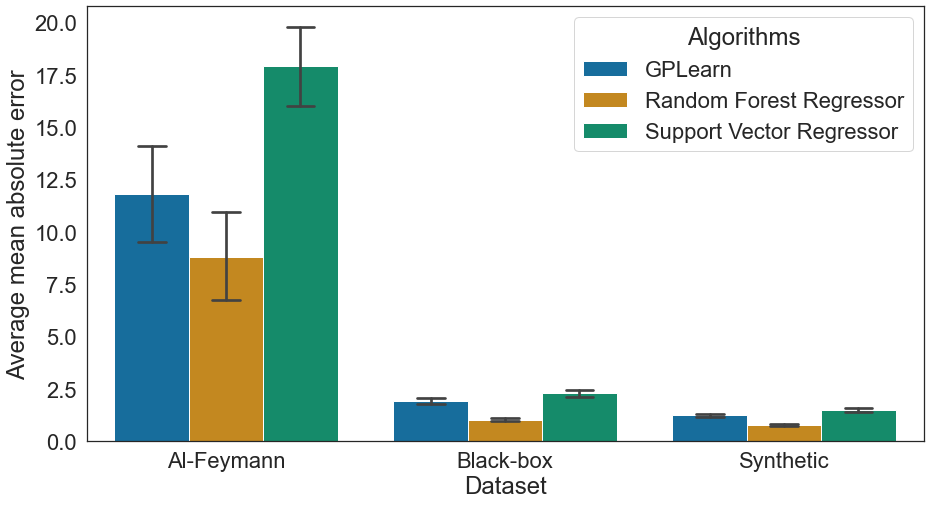

In [200]:
sns.set(font_scale=2)
sns.set_style("white")
alldata = alldata.rename(columns={"mae":"Average mean absolute error"})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean absolute error", hue= "Algorithms", palette="colorblind" ,capsize=.1, data = alldata)


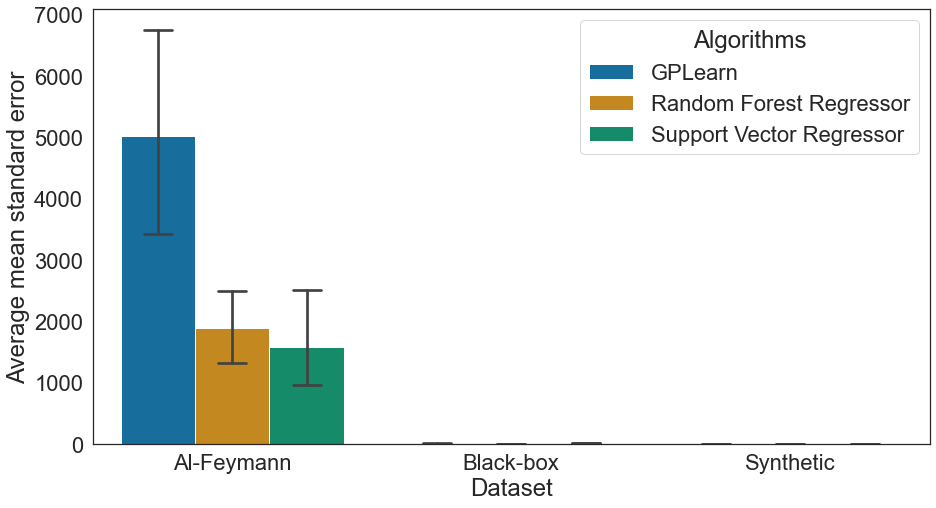

In [199]:
sns.set(font_scale=2)
sns.set_style("white")
alldata = alldata[alldata["Dataset"]!="Strogatz"]

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Dataset", y = "Average mean standard error", hue= "Algorithms", palette="colorblind" ,capsize=.1, data = alldata)


In [11]:
GPLearnBM["Algorithms"] = "GPLearn"
RRBM["Algorithms"] = "Random Forest Regressor"
SVBM["Algorithms"] = "Support Vector Regressor"


In [12]:
## Clean dataset
# for i in range(1246):
#     if Support_Vector_Regression.File[i].find("../Datasets/") != -1:
#         print(Support_Vector_Regression.File[i]) 
#         Support_Vector_Regression.File[i] = Support_Vector_Regression.File[i].replace("../Datasets/","")
# Support_Vector_Regression.to_csv("./SupportVectorRegression/time.csv", index=False)
# result = GPLearn.append(Random_Forest.append(Support_Vector_Regression))
# result = result.merge(all_stats, how='left', on='File')
# result

In [13]:
# models = {'GPLearn Symbolic Regression': ,
#           'Random Forest Regression': RR(),
#           'Support Vector Regression': SVR()
#          }

# Static visualisations

In [14]:
RStime = pd.read_csv("./WithoutIrace/time.csv")
RStime

,Cpu,mae,mse,rmse,File,name,scores,Best Scores,Parameters
0,155.943911,0.279372,0.145419,0.381339,../Datasets/nguyen-9.training.csv,GP,0.612557,0.446055,"{'population_size': 291, 'parsimony_coefficien..."
1,173.227082,0.667949,1.374475,1.172380,../Datasets/vladislavleva-3.training.csv,GP,-0.000443,-0.001261,"{'population_size': 496, 'parsimony_coefficien..."
2,154.185816,0.350418,0.186200,0.431509,../Datasets/nguyen-6.training.csv,GP,0.710204,0.683805,"{'population_size': 162, 'parsimony_coefficien..."
3,125.946630,0.143415,0.054236,0.232886,../Datasets/keijzer-5.training.csv,GP,0.844316,0.853511,"{'population_size': 389, 'parsimony_coefficien..."
4,114.790612,1.204074,4.366404,2.089594,../Datasets/nguyen-4.training.csv,GP,0.148455,0.204882,"{'population_size': 168, 'parsimony_coefficien..."
...,...,...,...,...,...,...,...,...,...
85,0.142641,1.408130,2.043403,1.429476,../Datasets/keijzer-9.training.csv,SVM,-2.491264,-2.309403,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
86,0.141266,0.088602,0.010309,0.101534,../Datasets/keijzer-1.training.csv,SVM,0.153579,-6.137884,"{'rbf_svm__max_iter': 100, 'rbf_svm__epsilon':..."
87,0.141160,0.698213,0.569401,0.754587,../Datasets/nguyen-7.training.csv,SVM,-0.169180,-6.441609,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
88,0.142665,0.316836,0.117509,0.342795,../Datasets/keijzer-10.training.csv,SVM,-0.095972,-0.398235,"{'rbf_svm__max_iter': 89, 'rbf_svm__epsilon': ..."


In [169]:
# Get best configurations according to irace using synthetic dataset
df = pd.read_csv("./Datasets/keijzer-4.training.csv")
            
size = len(df.columns)-1
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1)

est_irace = SymbolicRegressor(population_size=311,generations=46, stopping_criteria=0.01, p_crossover=0.8, p_subtree_mutation=0,
                           p_hoist_mutation=0, p_point_mutation=0,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.89, random_state=1)
est_default = SymbolicRegressor(random_state=1)
est_random = SymbolicRegressor(population_size=309,generations=46, stopping_criteria=0.01, p_crossover=0.77, p_subtree_mutation=0,p_hoist_mutation=0, p_point_mutation=0,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.92, random_state=1)
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
y_test_pred = est_irace.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)
all_s = [mae,mse,rmse]

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    49.06           318025       15         0.193554         0.332485     12.13s
   1     7.14          6.71122       15          0.19781         0.294187      5.21s
   2     2.56          2.23794        3          0.18983         0.366003      4.98s
   3     1.00         0.254521        1         0.206906         0.349467      4.67s
   4     1.00           0.2282        1         0.199986         0.411752      4.68s
   5     1.00         0.221301        1         0.195182         0.454985      4.47s
   6     1.00         0.221232        1         0.200824          0.40421      3.95s
   7     1.00          0.22136        1         0.191026         0.492393      4.00s
   8     1.00          0.22073        1         0.197498         0.434137  

In [16]:
# Fit training sets into model
est_default.fit(X_train, y_train)
y_test_pred = est_default.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.19753762089153282
0.09264636598641343
0.3043786556025462
[-0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552 -0.01431552
 -0.01431552]


In [17]:
# Fit training sets into model
est_random.fit(X_train, y_train)
y_test_pred = est_random.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    49.12           320084       15         0.193554         0.332485     11.49s
   1     7.05          4.55261       15          0.19781         0.294187      5.29s
   2     2.70         0.950945        3         0.189778         0.366474      4.51s
   3     1.00         0.262916        1         0.217109         0.497463      4.19s
   4     1.00         0.245361        1         0.224258         0.433117      4.22s
   5     1.00         0.245602        1         0.219544         0.475541      4.11s
   6     1.00         0.245312        1         0.225842         0.418859      4.03s
   7     1.00         0.245396        1         0.214837         0.517909      4.03s
   8     1.00         0.244663        1         0.219262         0.478084  

In [173]:
est_irace = RandomForestRegressor(n_estimators=462, max_depth=15,n_jobs= 1, verbose=15, random_state = 1)
est_default = RandomForestRegressor(random_state = 1)
est_random = RandomForestRegressor(n_estimators=497, max_depth=11,n_jobs= 3, verbose=10, random_state = 1)
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
iy_test_pred = est_irace.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

building tree 1 of 462
building tree 2 of 462
building tree 3 of 462
building tree 4 of 462
building tree 5 of 462
building tree 6 of 462
building tree 7 of 462
building tree 8 of 462
building tree 9 of 462
building tree 10 of 462
building tree 11 of 462
building tree 12 of 462
building tree 13 of 462
building tree 14 of 462
building tree 15 of 462
building tree 16 of 462
building tree 17 of 462
building tree 18 of 462
building tree 19 of 462
building tree 20 of 462
building tree 21 of 462
building tree 22 of 462
building tree 23 of 462
building tree 24 of 462
building tree 25 of 462
building tree 26 of 462
building tree 27 of 462
building tree 28 of 462
building tree 29 of 462
building tree 30 of 462
building tree 31 of 462
building tree 32 of 462
building tree 33 of 462
building tree 34 of 462
building tree 35 of 462
building tree 36 of 462
building tree 37 of 462
building tree 38 of 462
building tree 39 of 462
building tree 40 of 462
building tree 41 of 462
building tree 42 of 462
b

[Parallel(n_jobs=1)]: Done 462 out of 462 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

In [174]:
iacc = float(np.sum(y_test == iy_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-iacc))

# Mean absolute error
imae = mean_absolute_error(y_test, iy_test_pred)
# Mean squared error to check performance
imse = mean_squared_error(y_test, iy_test_pred)
# Root mean squared error to check accuracy
irmse = sqrt(imse)
print(imae)
print(imse)
print(irmse)

Error: 1.000000
0.015480626604639527
0.000667316067572243
0.02583246150819242


In [175]:
# Fit training sets into model
est_default.fit(X_train, y_train)
dy_test_pred = est_default.predict(X_test)

dacc = float(np.sum(y_test == dy_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-dacc))

# Mean absolute error
dmae = mean_absolute_error(y_test, dy_test_pred)
# Mean squared error to check performance
dmse = mean_squared_error(y_test, dy_test_pred)
# Root mean squared error to check accuracy
drmse = sqrt(dmse)
print(dmae)
print(dmse)
print(drmse)

Error: 1.000000
0.015858728156966217
0.0007109748885120509
0.026664112370601255


In [176]:
# Fit training sets into model
est_random.fit(X_train, y_train)
ry_test_pred = est_random.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.1s
[Para

building tree 1 of 497building tree 2 of 497

building tree 3 of 497
building tree 4 of 497
building tree 5 of 497
building tree 6 of 497
building tree 7 of 497
building tree 8 of 497
building tree 9 of 497
building tree 10 of 497
building tree 11 of 497
building tree 12 of 497
building tree 13 of 497
building tree 14 of 497
building tree 15 of 497
building tree 16 of 497
building tree 17 of 497
building tree 18 of 497
building tree 19 of 497building tree 20 of 497

building tree 21 of 497
building tree 22 of 497
building tree 23 of 497building tree 24 of 497
building tree 25 of 497

building tree 26 of 497
building tree 27 of 497
building tree 28 of 497
building tree 29 of 497
building tree 30 of 497
building tree 31 of 497
building tree 32 of 497
building tree 33 of 497building tree 34 of 497

building tree 35 of 497building tree 36 of 497building tree 37 of 497


building tree 38 of 497
building tree 39 of 497building tree 40 of 497

building tree 41 of 497
building tree 42 of 497bu

[Parallel(n_jobs=3)]: Done 332 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 415 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 475 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 497 out of 497 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    0

In [177]:
racc = float(np.sum(y_test == ry_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-racc))

# Mean absolute error
rmae = mean_absolute_error(y_test, ry_test_pred)
# Mean squared error to check performance
RFmse = mean_squared_error(y_test, ry_test_pred)
# Root mean squared error to check accuracy
rrmse = sqrt(RFmse)
print(rmae)
print(RFmse)
print(rrmse)

Error: 1.000000
0.015482163190644339
0.0006722238431702758
0.025927279903034096


In [178]:
est_irace = make_pipeline(StandardScaler(),SVR(C=6247.89, epsilon=6.36, tol = 1.0, max_iter = 239))
est_default = make_pipeline(StandardScaler(),SVR())
est_random = make_pipeline(StandardScaler(),SVR(C=9, epsilon=0.7, tol = 0.7867303370786517, max_iter = 35))
                           
# Fit training sets into model
est_irace.fit(X_train, y_train)
y_test_pred = est_irace.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.19311334611473205
0.08884315194102471
0.29806568393732397


In [179]:
# Fit training sets into model
est_default.fit(X_train, y_train)
y_test_pred = est_default.predict(X_test)

acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.18663847875389095
0.06695343921841454
0.2587536264836003


In [180]:
est_random.fit(X_train, y_train)
y_test_pred = est_random.predict(X_test)
acc = float(np.sum(y_test == y_test_pred)) / y_test.shape[0]
print("Error: %.6f" %(1-acc))

# Mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
# Mean squared error to check performance
mse = mean_squared_error(y_test, y_test_pred)
# Root mean squared error to check accuracy
rmse = sqrt(mse)
print(mae)
print(mse)
print(rmse)

Error: 1.000000
0.19311334611473205
0.08884315194102471
0.29806568393732397


In [185]:
data = [[0.19326794043834367,0.08624811240424153,0.29368028943775154,"GPLearn","irace"],[0.19753762089153282, 0.09264636598641343,0.3043786556025462,"GPLearn","Default"] ,[0.2051935833201989, 0.08737289134686937,0.29558905823265746,"GPLearn","RandomCV"], [imae, imse , irmse,"Random Forest","irace"],[dmae,dmse,drmse,"Random Forest","Default"] ,[rmae, RFmse,rrmse,"Random Forest","RandomCV"], [0.19311334611473205, 0.08884315194102471,0.29806568393732397,"SVR","irace"],[0.18663847875389095, 0.06695343921841454,0.2587536264836003,"SVR","Default"] ,[0.19311334611473205, 0.08884315194102471,0.29806568393732397,"SVR","RandomCV"]]
# Create the pandas DataFrame
all_s = pd.DataFrame(data, columns = ['Mean absolute error', 'Mean squared error','rmse','Algorithm','Status'])
all_s = all_s.rename(columns={"rmse":"Root mean squared error"})

In [186]:
all_s

,Mean absolute error,Mean squared error,Root mean squared error,Algorithm,Status
0,0.193268,0.086248,0.293680,GPLearn,irace
1,0.197538,0.092646,0.304379,GPLearn,Default
2,0.205194,0.087373,0.295589,GPLearn,RandomCV
3,0.015481,0.000667,0.025832,Random Forest,irace
4,0.015859,0.000711,0.026664,Random Forest,Default
5,0.015482,0.000672,0.025927,Random Forest,RandomCV
6,0.193113,0.088843,0.298066,SVR,irace
7,0.186638,0.066953,0.258754,SVR,Default
8,0.193113,0.088843,0.298066,SVR,RandomCV


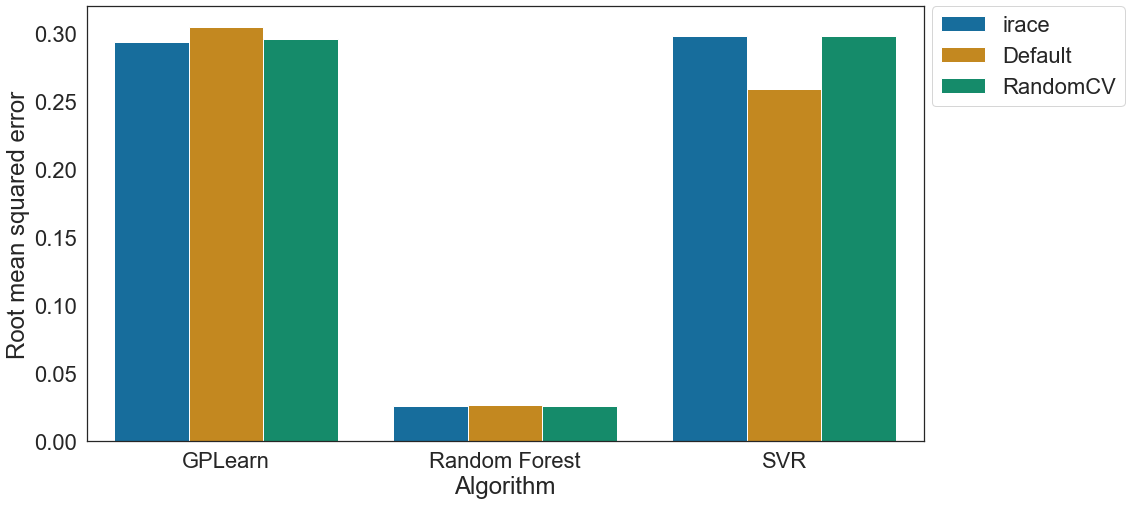

In [197]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(15,8))


ax = sns.barplot(x= "Algorithm", y="Root mean squared error", hue="Status", palette = "colorblind", data=all_s )
sns.color_palette("colorblind")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


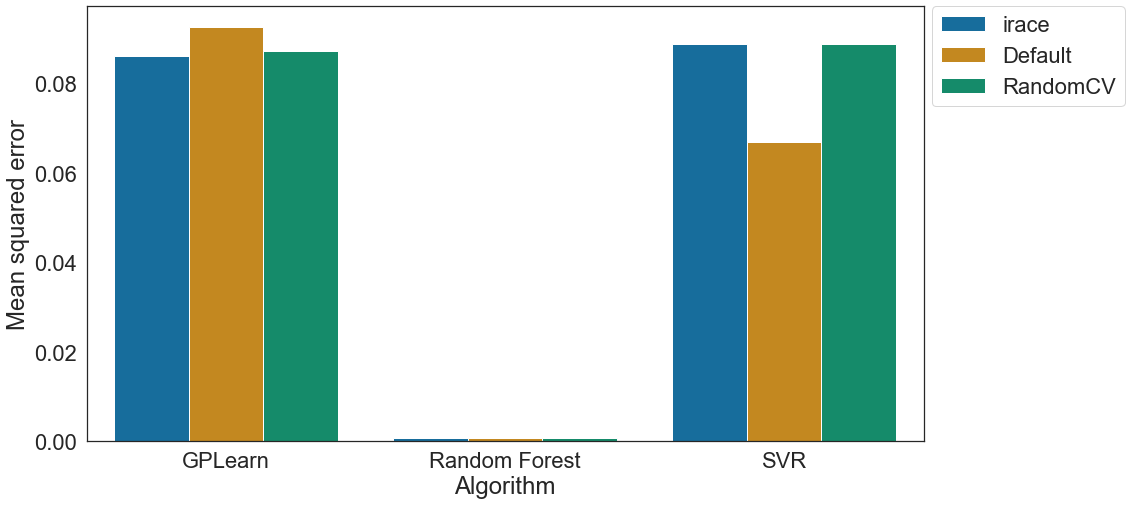

In [196]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(15,8))
g = sns.barplot(x= "Algorithm", y='Mean squared error', hue="Status", palette = "colorblind", data=all_s )
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
# for index, row in all_s.iterrows():
#     g.text(row.name,row['Mean squared error'], round(row['Mean squared error'],2), color='black', ha="center")



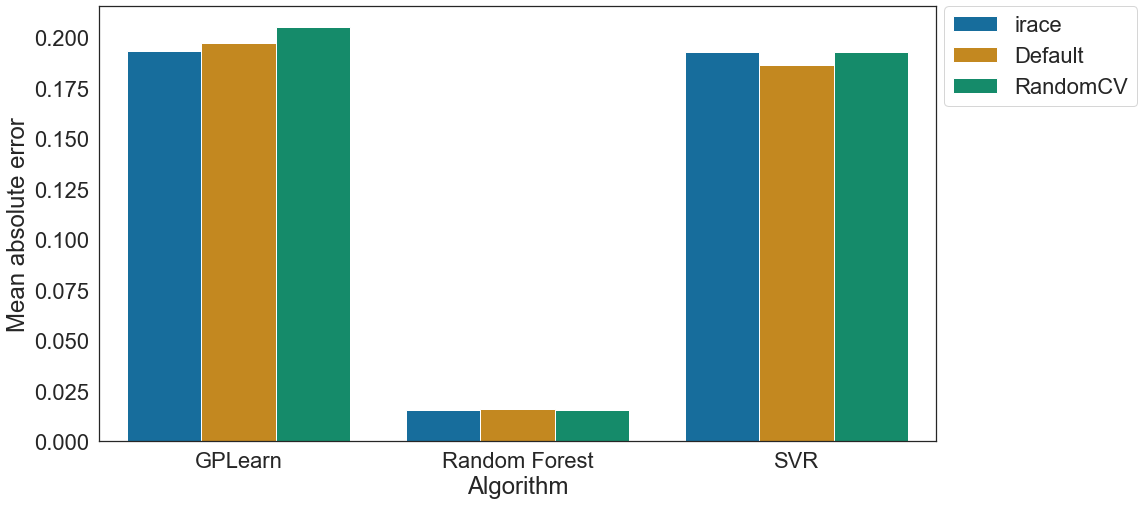

In [198]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(15,8))
ax = sns.barplot(x= "Algorithm", y="Mean absolute error", hue="Status", palette = "colorblind", data=all_s )
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)



In [50]:
sum(all_GP["Cpu"])

34736.303535000014

In [51]:
sum(all_RR["Cpu"])

20084.718331999986

In [52]:
sum(all_SVR["Cpu"])

356.6395269999999

In [205]:
dftime = pd.read_csv("./WithoutIrace/time.csv")
dftimeGP = dftime[dftime.name=="GP"]
dftimeRR = dftime[dftime.name=="RR"]
dftimeSVR = dftime[dftime.name=="SVM"]
dftime

,Cpu,mae,mse,rmse,File,name,scores,Best Scores,Parameters
0,155.943911,0.279372,0.145419,0.381339,../Datasets/nguyen-9.training.csv,GP,0.612557,0.446055,"{'population_size': 291, 'parsimony_coefficien..."
1,173.227082,0.667949,1.374475,1.172380,../Datasets/vladislavleva-3.training.csv,GP,-0.000443,-0.001261,"{'population_size': 496, 'parsimony_coefficien..."
2,154.185816,0.350418,0.186200,0.431509,../Datasets/nguyen-6.training.csv,GP,0.710204,0.683805,"{'population_size': 162, 'parsimony_coefficien..."
3,125.946630,0.143415,0.054236,0.232886,../Datasets/keijzer-5.training.csv,GP,0.844316,0.853511,"{'population_size': 389, 'parsimony_coefficien..."
4,114.790612,1.204074,4.366404,2.089594,../Datasets/nguyen-4.training.csv,GP,0.148455,0.204882,"{'population_size': 168, 'parsimony_coefficien..."
...,...,...,...,...,...,...,...,...,...
85,0.142641,1.408130,2.043403,1.429476,../Datasets/keijzer-9.training.csv,SVM,-2.491264,-2.309403,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
86,0.141266,0.088602,0.010309,0.101534,../Datasets/keijzer-1.training.csv,SVM,0.153579,-6.137884,"{'rbf_svm__max_iter': 100, 'rbf_svm__epsilon':..."
87,0.141160,0.698213,0.569401,0.754587,../Datasets/nguyen-7.training.csv,SVM,-0.169180,-6.441609,"{'rbf_svm__max_iter': 84, 'rbf_svm__epsilon': ..."
88,0.142665,0.316836,0.117509,0.342795,../Datasets/keijzer-10.training.csv,SVM,-0.095972,-0.398235,"{'rbf_svm__max_iter': 89, 'rbf_svm__epsilon': ..."


In [232]:
timedf = [[34736.303535000014,"GPLearn","irace"],[20084.718331999986,"Random Forest Regression","irace"],[356.6395269999999,"Support Vector Regression","irace"],[sum(dftimeGP["Cpu"]),"GPLearn","RandomCV"],[sum(dftimeRR["Cpu"]),"Random Forest Regression","RandomCV"],[sum(dftimeSVR["Cpu"]),"Support Vector Regression","RandomCV"]]
# Create the pandas DataFrame
all_rr = pd.DataFrame(timedf, columns = ['Total CPU computational time [s]','Algorithm','Status'])
all_rr["log10(Total CPU computational time [s])"] = np.log10(all_rr["Total CPU computational time [s]"])

all_rr

,Total CPU computational time [s],Algorithm,Status,log10(Total CPU computational time [s])
0,34736.303535,GPLearn,irace,4.540784
1,20084.718332,Random Forest Regression,irace,4.302866
2,356.639527,Support Vector Regression,irace,2.552229
3,4688.803577,GPLearn,RandomCV,3.671062
4,250.752489,Random Forest Regression,RandomCV,2.399245
5,4.388731,Support Vector Regression,RandomCV,0.642339


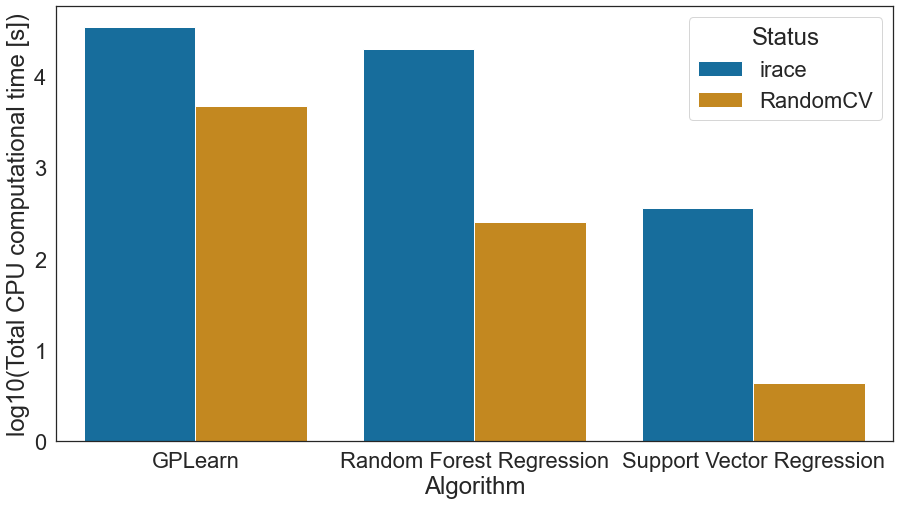

In [233]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(15,8))
ax = sns.barplot(x= "Algorithm", y='log10(Total CPU computational time [s])', hue="Status", palette="colorblind", data=all_rr )

In [238]:
dfttimeGP = all_rr[all_rr.Algorithm=="GPLearn"]
dfttimeRR = all_rr[all_rr.Algorithm=="Random Forest Regression"]
dfttimeSVR = all_rr[all_rr.Algorithm=="Support Vector Regression"]


<AxesSubplot:xlabel='Algorithm', ylabel='log10(Total CPU computational time [s])'>

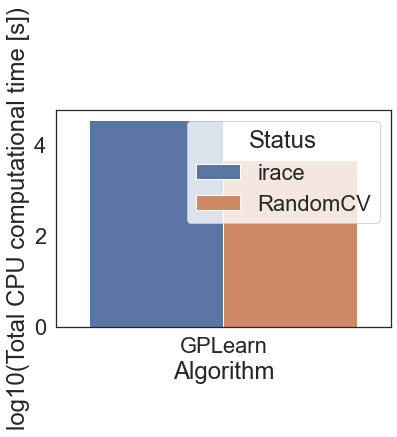

In [239]:
sns.barplot(x= "Algorithm", y='log10(Total CPU computational time [s])', hue="Status", data=dfttimeGP )

<AxesSubplot:xlabel='Algorithm', ylabel='log10(Total CPU computational time [s])'>

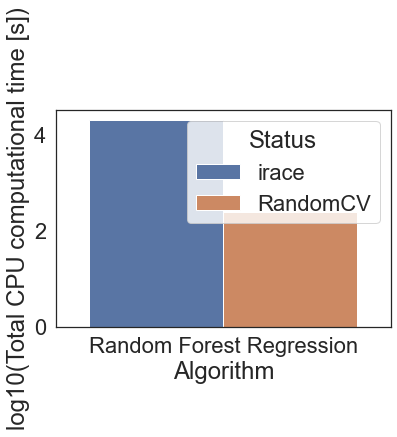

In [242]:
sns.barplot(x= "Algorithm",  y='log10(Total CPU computational time [s])', hue="Status", data=dfttimeRR )

<AxesSubplot:xlabel='Algorithm', ylabel='log10(Total CPU computational time [s])'>

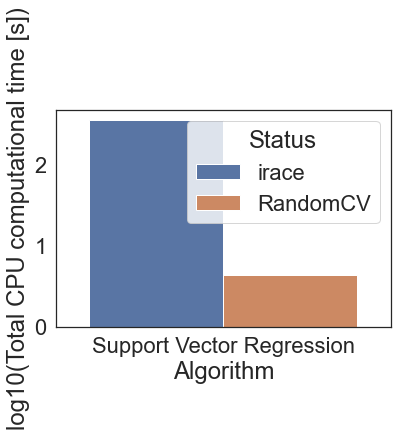

In [243]:
sns.barplot(x= "Algorithm",  y='log10(Total CPU computational time [s])', hue="Status", data=dfttimeSVR )

## Statistical tests

In [248]:
import scipy.stats as stats
# ANOVA for three groups of algorithms
stats.f_oneway(alldata["Root mean squared error on average"][alldata['Algorithms'] == 'GPLearn'],
               alldata["Root mean squared error on average"][alldata['Algorithms'] == 'Random Forest Regressor'],
               alldata["Root mean squared error on average"][alldata['Algorithms'] == 'Support Vector Regressor'])

F_onewayResult(statistic=18.25423747369989, pvalue=1.2258868580066708e-08)

In [247]:
# Independent t-test for with and without irace
import researchpy as rp
rp.ttest(group1= all_rr['log10(Total CPU computational time [s])'][all_rr['Status'] == 'irace'], group1_name= "With irace",
         group2= all_rr['log10(Total CPU computational time [s])'][all_rr['Status'] == 'RandomCV'], group2_name= "With Random Search CV")

(                Variable    N      Mean        SD        SE  95% Conf.  \
 0             With irace  3.0  3.798626  1.085947  0.626972   1.100985   
 1  With Random Search CV  3.0  2.237549  1.520822  0.878047  -1.540383   
 2               combined  6.0  3.018088  1.458753  0.595534   1.487220   
 
    Interval  
 0  6.496267  
 1  6.015481  
 2  4.548955  ,
                                   Independent t-test  results
 0  Difference (With irace - With Random Search CV...   1.5611
 1                              Degrees of freedom =    4.0000
 2                                               t =    1.4469
 3                           Two side test p value =    0.2215
 4                          Difference < 0 p value =    0.8893
 5                          Difference > 0 p value =    0.1107
 6                                       Cohen's d =    1.1814
 7                                       Hedge's g =    0.9451
 8                                   Glass's delta =    1.4375
 9     